# Исследовательский анализ данных рынка заведений общественного питания Москвы

Автор: Дарья Грибкова

### Цели и задачи проекта

**Цель:** провести исследовательный анализ рынка общественного питания Москвы с целью открытия нового заведения.

**Задачи:**
1. Загрузить данные и ппознакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сделать итоговый вывод и составить рекомендации.

### Описание данных

Для анализа данных представлены два датасета:

- `/datasets/rest_info.csv` - информация о заведениях общественного питания;
- `/datasets/rest_price.csv` - информация о среднем чеке в заведениях общественного питания.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

## 1. Загрузка данных и знакомство с ними
**Для начала работы необходимо загрузить датасеты `/datasets/rest_info.csv`  и `/datasets/rest_price.csv`. Также, необходимо подключить следующие библиотеки:**
- `pandas` - для работы с данными;
- `matplotlib` и `seaborn` - для визуализаций;
- `phik` - для выявления корреляции между данными.

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.4 MB/s eta 0:00:01


In [2]:
# Подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from phik import phik_matrix

In [3]:
# Загружаем датасеты в переменные
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

**Познакомимся с данными датасета `/datasets/rest_info.csv` и изучим о них информацию.**

In [4]:
# Выводим первые 5 строк датасета
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датасете
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 8406 строк и 9 столбцов, в которых представлена информация о среднем чеке в заведениях общественного питания.

**На основании знакомства с данными можно сделать следующие выводы:**
- Названия столбцов приведены к корректному виду snake case.
- В датасете содержатся 2 столбца с числовым типом данных `float64`, 1 столбец с числовым типом данных `int64`, 6 стобцов со строчным типом данных `object`.
- Столбцы `hours` и `seats` содержат явные пропуски.
- Столбец `seats` нужно привести к целочисленному типу данных, т.к. кол-во посадочных мест не может быть дробным числом.
- Данные соответсвуют своему описанию.

**Познакомимся с данными датафрейма `/datasets/rest_price.csv` и изучим о них информацию.**

In [6]:
# Выводим первые 5 строк датасета
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датасете
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 4058 строк и 5 столбцов, в которых представлена информация о заведениях общественного питания.

**На основании знакомства с данными можно сделать следующие выводы:**
- Названия столбцов приведены к корректному виду snake case.
- В датасете содержатся 2 столбца с числовым типом данных `float64` и 3 столбца со строчным типом данных `object`.
- Столбцы `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` содержат явные пропуски.
- Данные соответсвуют своему описанию.

### Подготовка единого датафрейма

**Для дальнейшего анализа необходимо создать единый датафрейм. Создавать датафрейм будем путем левого джойна датасета `/datasets/rest_price.csv` к датасету `/datasets/rest_info.csv`, т.к. нам важно сохранить всю информацию в датасете `/datasets/rest_info.csv`, который является ключевым.**

In [8]:
# Создаем единый датафрейм
rest_df = rest_info.merge(rest_price, on='id', how='left')

In [9]:
# Выводим первые 5 строк нового датафрейма
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
# Выводим информацию о новом датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Итоговый датафрейм `rest_df` содержит 8406 строк и 13 столбцов.

## 2. Предобработка данных

**Необходимо привести столбец `seat` к типу данных `int64`, т.к. кол-во посадочных мест не может быть дробным числом. Пропущенные значения заменим на ноль. Гипотеза: пропущенные значения в столбце `seat` означают, что это формат места 'на вынос' или присутствует только доставка.**

In [11]:
# Меняем тип данных в столбце
rest_df['seats'] = pd.to_numeric(rest_df['seats'], errors='coerce').fillna(0).astype(int)

In [12]:
# Проверяем, изменился ли тип данных в столбце
print(rest_df['seats'].dtypes)

int64


**Необходимо изучить и посчитать кол-во пропусков в данных по всем столбцам.**

In [13]:
# Считаем количество пропусков в каждом столбце
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [14]:
# Посчитаем долю строк с пропусками
rest_df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.000000
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Столбцы `hours`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` содержат пропуски. Ранее пропуски так же содержались в столбце `seat`, но при смене типа данных на целочисленный, пропуски были заменены на 0 в связи с гипотизой о том, что пропуски связаны с типом заведения.

По столбцам, в которых наблюдаются пропуски, можно предположить следующее:
- Пропуски в солбце `hours`, который содержит информацию о времени работы заведения, вероятно, связаны с тем, что заведение закрыто по какой-либо причине (ремонт, ликвидация и т.д.).
- По первичной оценке можно заметить, что если у заведения нет информации о посадочном месте, то у него так же пропуск в столбце `price`, который содержит информацию о категории цен в заведнии. Здесь можно выдвинуть гипотезу, что заведения, которые предположительно работают 'на вынос' или только в доставке, не пападют в рейтинг по ценовым категориям.
- Пропуск в столбце `avg_bill`, вероятно, связан с тем, что такой учет в заведении не велся.
- Пропуск в столбце `middle_avg_bill` имеет место быть, если есть пропуск в столбце `avg_bill`. Также, здесь будет пропуск, если заведения является форматом 'кофе с собой'.
- Пропуск в столбце `middle_coffee_cup` имеет место быть, если есть пропуск в столбце `avg_bill`. Также, здесь будет пропуск, если заведения НЕ является форматом 'кофе с собой'.

По итогу анализа пропусков датафрейме были приняты следующие решения:
- В столбце `seat` заменить пропуски на 0.
- В столбцах `hours`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` оставить пропуски в неизменном виде для корректного анализа.

**Необходимо проверить данные на явные и неявные дубликаты для нальнейшего корректиного анализа. Каждая строка должна содержать уникальный `id` заведения.**

In [15]:
# Посчитаем количество явных дубликатов
rest_df.duplicated().sum()

0

In [16]:
# Посчитаем количество дубликатов по id
rest_df.duplicated(subset='id').sum()

0

In [17]:
# Проверим уникальные занчения в столбцах category, district, price
for column in ['category', 'district', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    unique_values = rest_df[column].unique()
    print(unique_values)
    print()

Уникальные значения в столбце category:
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']

Уникальные значения в столбце district:
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']

Уникальные значения в столбце price:
[nan 'выше среднего' 'средние' 'высокие' 'низкие']



In [18]:
# Посчитаем количество дубликатов по столбцам name и address
rest_df['name'] = rest_df['name'].str.lower()
rest_df['address'] = rest_df['address'].str.lower()

rest_df.duplicated(subset=['name', 'address']).sum()

4

In [19]:
# Удалим найденные дубликаты
rest_df = rest_df.drop_duplicates(subset=['name', 'address'])

По итогу проверки данных были найдены 4 дубликата.

**Создадим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно:**
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [20]:
# Создаем новый столбец с информацией о работе заведения
def check_24_7(hours):
    if pd.isna(hours):
        return False
    elif 'ежедневно' in hours:
        if '00:00' in hours or '24:00' in hours:
            return True
        return False
    
rest_df['is_24_7'] = rest_df['hours'].apply(check_24_7)

In [21]:
# Проверяем новый столбец
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,0,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,None
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


Итог предобработки данных:

- Тип данных в столбце `seats` был изменем с `float64` на `int64`.
- Дубликаты в датафрейме не найдены.
- Добавлен новый столбец `is_24_7` с информацией о ежедневной и круглосуточной работе заведений.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

**Исследуем количество объектов общественного питания по каждой категории.**

In [22]:
# Делаем группировку по столбцу category
rest_category = rest_df.groupby('category')['id'].count()
rest_category = rest_category.sort_values(ascending=False)

print(rest_category)

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: id, dtype: int64


In [23]:
# Посчитаем кол-во заведений по категориям в процентах
rest_category = rest_df['category'].value_counts(normalize=True) * 100

print(rest_category)

кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: category, dtype: float64


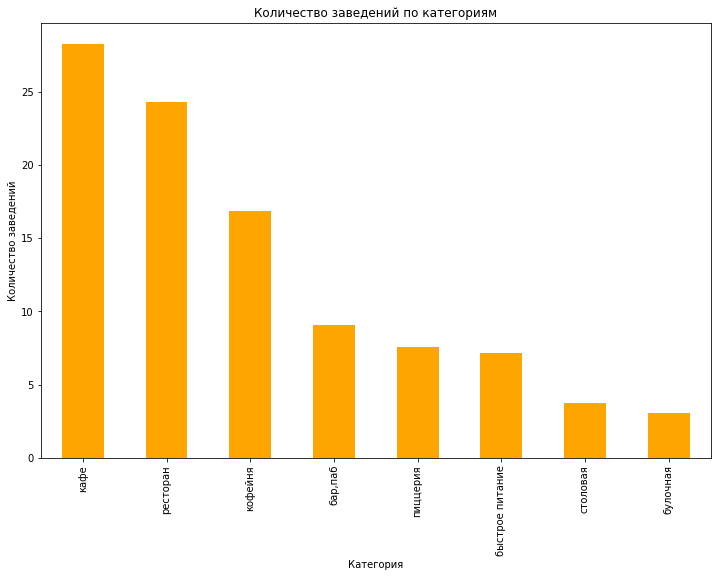

In [24]:
# Построим столбчатую диаграмму по количеству заведений в каждой категории
plt.figure(figsize=(12, 8))


rest_category.plot(kind='bar', color='orange')

plt.title('Количество заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')

plt.show()

Наибольшее количество заведений мы можем наблюдать в категориях кафе, ресторан и кофейня.

---

### Задача 2

**Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.**

In [25]:
# Делаем группировку по столбцу district
rest_district = rest_df.groupby('district')['id'].count()
rest_district = rest_district.sort_values(ascending=False)

print(rest_district)

district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64


In [26]:
# Посчитаем кол-во заведений по районам в процентах
rest_district = rest_df['district'].value_counts(normalize=True) * 100

print(rest_district)

Центральный административный округ         26.684123
Северный административный округ            10.687931
Южный административный округ               10.616520
Северо-Восточный административный округ    10.592716
Западный административный округ            10.116639
Восточный административный округ            9.497739
Юго-Восточный административный округ        8.497977
Юго-Западный административный округ         8.438467
Северо-Западный административный округ      4.867889
Name: district, dtype: float64


Text(0, 0.5, 'Количество заведений')

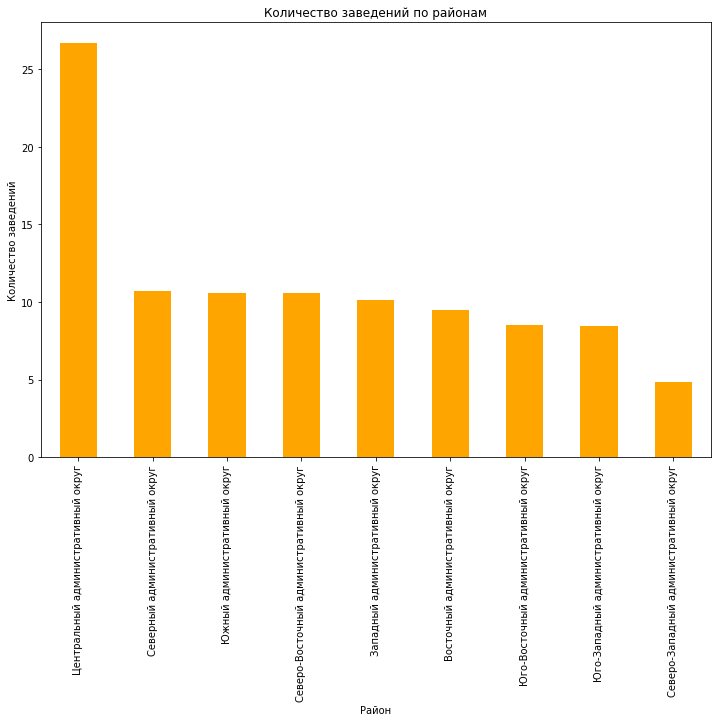

In [27]:
# Построим столбчатую диаграмму по количеству заведений в каждом районе Москвы
plt.figure(figsize=(12, 8))


rest_district.plot(kind='bar', color='orange')

plt.title('Количество заведений по районам')
plt.xlabel('Район')
plt.ylabel('Количество заведений')

Наибольшее количетсво заведений наблюдается в Центральном административном округе.

In [28]:
# Делаем группировку по столбцу category в Центральном административном округе
rest_district_center = rest_df[rest_df['district'] == 'Центральный административный округ']
rest_category_center = rest_district_center.groupby('category')['id'].count()
rest_category_center = rest_category_center.sort_values(ascending=False)

print(rest_category_center)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64


Text(0, 0.5, 'Количество заведений')

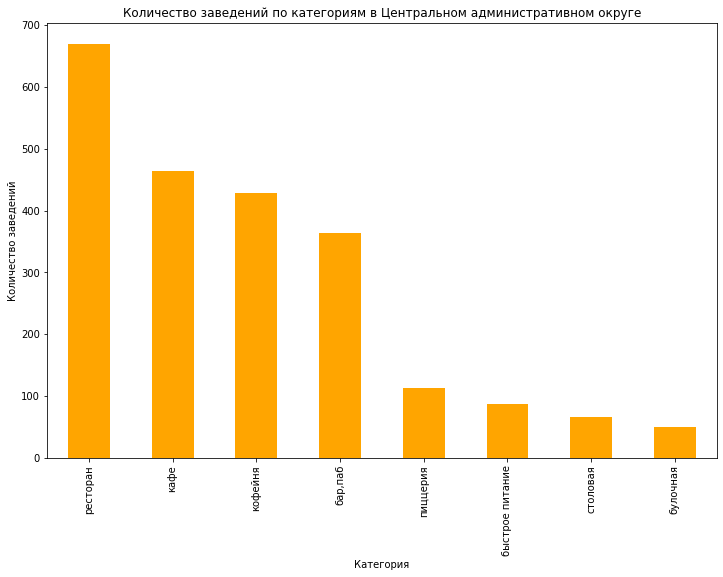

In [29]:
# Построим столбчатую диаграмму по категория в Центральном административном округе
plt.figure(figsize=(12, 8))

rest_category_center.plot(kind='bar', color='orange')

plt.title('Количество заведений по категориям в Центральном административном округе')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')

В Центральном административном округе лидируют такие категории, как рестораны, кафе и кофейни.

---

### Задача 3

**Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.**

In [30]:
# Посмотрим, сколько заведений являются сетевыми, а сколько - нет
rest_chain = rest_df.groupby('chain')['id'].count()

print(rest_chain)

chain
0    5199
1    3203
Name: id, dtype: int64


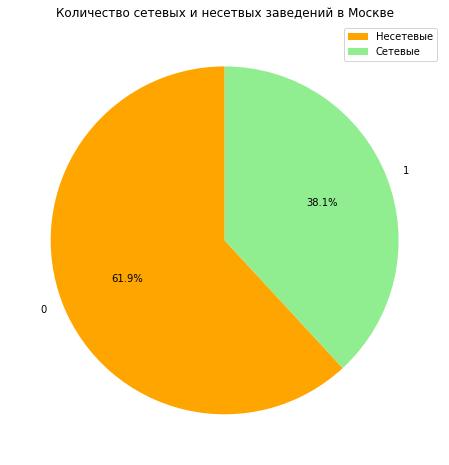

In [31]:
# Построим столбчатую диаграмму по сетевым и несетевым заведениям
plt.figure(figsize=(12, 8))

rest_chain.plot(kind='pie', 
                colors=['orange', 'lightgreen'],
                autopct='%1.1f%%',
                startangle=90)

plt.title('Количество сетевых и несетвых заведений в Москве')
plt.ylabel('')
plt.legend(labels=['Несетевые', 'Сетевые'])

plt.show()

Можем наблюдать, что несетевых заведений примерно в полтора раза больше, чем сетевых.

In [32]:
# Сделаем сводную таблицу, что посмотреть количество типов заведений в каждой категории
rest_chain_category = rest_df.pivot_table(values='id', index='category', columns='chain', aggfunc='count')

print(rest_chain_category)

chain               0    1
category                  
бар,паб           596  168
булочная           99  157
быстрое питание   371  232
кафе             1597  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  729
столовая          227   88


In [33]:
# Добавим временный столбец с суммой заведений для сортировки графика
rest_chain_category['total'] = rest_chain_category.sum(axis=1)
rest_chain_category = rest_chain_category.sort_values(by='total', ascending=False).drop(columns='total')

print(rest_chain_category)

chain               0    1
category                  
кафе             1597  779
ресторан         1313  729
кофейня           693  720
бар,паб           596  168
пиццерия          303  330
быстрое питание   371  232
столовая          227   88
булочная           99  157


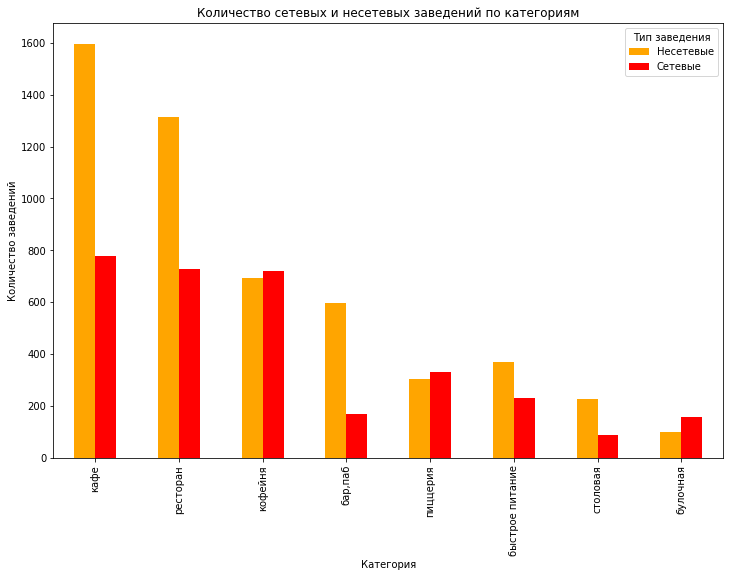

In [34]:
# Построим столбчатую диаграмму на основе сводной таблицы по типам и категориям
rest_chain_category.plot(kind='bar', figsize=(12, 8), color=['orange', 'red'])

plt.title('Количество сетевых и несетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.legend(title='Тип заведения', labels=['Несетевые', 'Сетевые'])

plt.show()

По данным исследования типов заведениям по категориям мы можем наблюдать следующее:

- Сетевые заведения преобладают в таких категориях, как булочная, кофейня и пиццерия, но с небольшим отрывом.
- Несетевые заведения, причем с сильном отрывом (превышаю по количеству сетевые примерно в 2 раза), преобладают в остальных категориях.

---

### Задача 4

**Исследуем количество посадочных мест в заведениях. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.**


In [35]:
# Выгрузим меры центральной тенденции по столбцу seats
rest_seats_describe = rest_df['seats'].describe()

print(rest_seats_describe)

count    8402.000000
mean       61.802904
std       107.160755
min         0.000000
25%         0.000000
50%        20.000000
75%        85.000000
max      1288.000000
Name: seats, dtype: float64


По ключевым показателям предварительно можно сказать, что данные распределны не симметрично, так как есть отрыв между медианой и средним.

Text(0, 0.5, 'Количество заведенний')

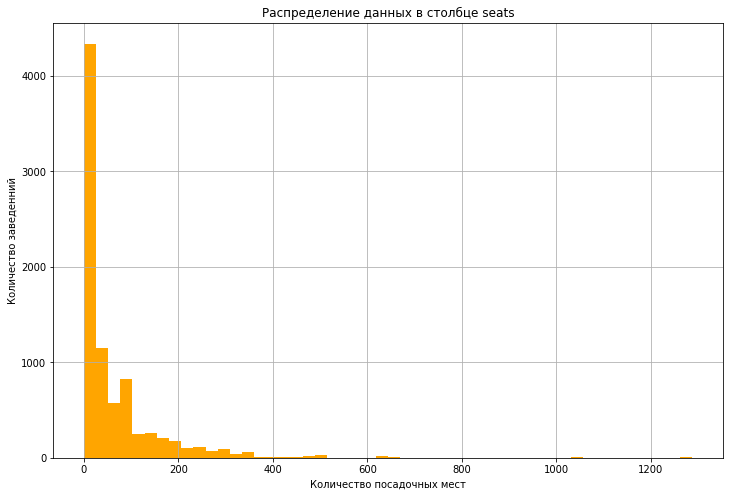

In [36]:
# Построим гистограмму, чтобы увидеть распределние данных в столбце seats
rest_df['seats'].hist(figsize=(12, 8), bins=50, color='orange')

plt.title('Распределение данных в столбце seats')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведенний')

Исходя из гистограммы мы можем наблюдать скошенность влево. Большая часть значений приближена к нулю. Также можем наблюдать аномально большие значения.

Text(0.5, 0, 'Количество посадочных мест')

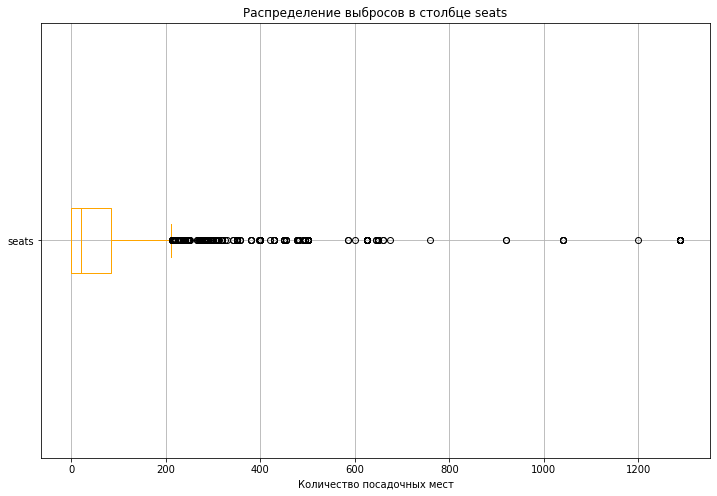

In [37]:
# Для наблюдением за выбросами построим диаграмму размаха по столбцу seats
rest_seats_visual = rest_df.boxplot(column='seats', vert=False, figsize=(12, 8), color='orange')

rest_seats_visual.set_title('Распределение выбросов в столбце seats')
rest_seats_visual.set_xlabel('Количество посадочных мест')

В столбце seats, в котором находятся данные о кличестве посадочных мест, можем наблюдать большое количество аномально больших значений выше 200. Гипотеза: возможно, это техническая ошибка при сохранении данных о количестве месте (например, вместо 1200 мест, должно быть 120.0)

In [38]:
# Посчитаем среднее количество посадочных мест по каждой категории
rest_seats_category = rest_df.groupby('category')['seats'].mean()
rest_seats_category = rest_seats_category.sort_values(ascending=False)

print(rest_seats_category)

category
бар,паб            76.087696
ресторан           75.749755
пиццерия           63.744076
кофейня            59.101911
быстрое питание    57.235489
столовая           51.933333
булочная           51.675781
кафе               49.871212
Name: seats, dtype: float64


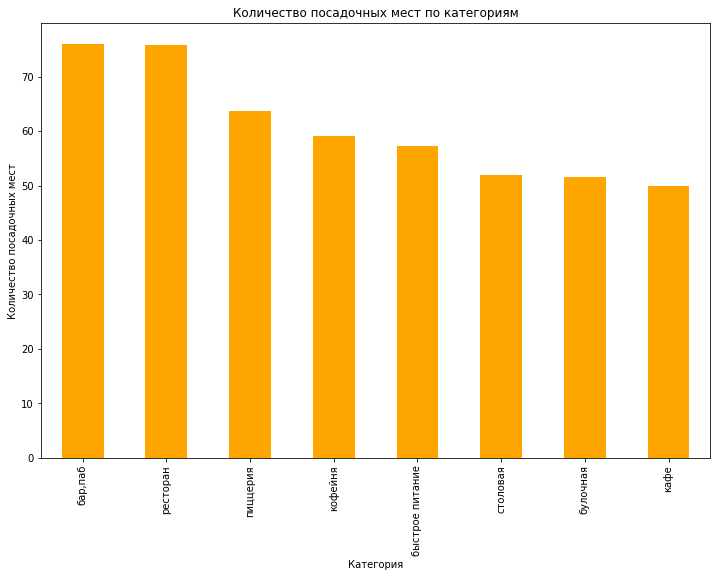

In [39]:
# Отобразим на графике количество посадочных мест по каждый категории
rest_seats_category.plot(kind='bar', figsize=(12, 8), color='orange')

plt.title('Количество посадочных мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество посадочных мест')

plt.show()

С учетом выбросов можем наблюдать наибольшее количество посадочных мест в категории 'бар, паб'

---

### Задача 5

**Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений.**

In [40]:
# Выгрузим меры центральной тенденции по столбцу rating
rest_rating_describe = rest_df['rating'].describe()

print(rest_rating_describe)

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


In [41]:
# Сгруппируем категории заведений по среднему рейтингу
rest_raiting_category = rest_df.groupby('category')['rating'].mean()
rest_raiting_category = rest_raiting_category.sort_values(ascending=False)

print(rest_raiting_category)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64


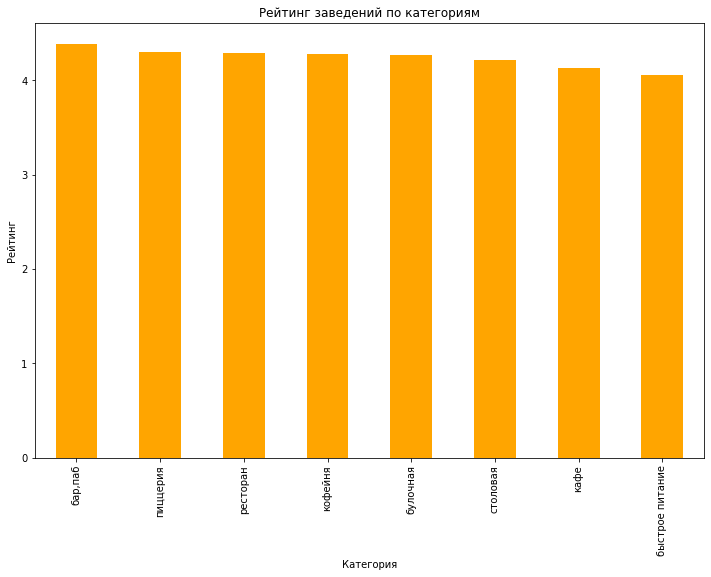

In [42]:
# Визуализируем распределение среднего рейтинга по категориям
rest_raiting_category.plot(kind='bar', figsize=(12, 8), color='orange')

plt.title('Рейтинг заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Рейтинг')

plt.show()

По данным исследования рейтинга заведений можно сказать, что он практически не зависит от категории заведения.

---

### Задача 6

**Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Посмотрим матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.**

In [43]:
# Считаем коррелцию для столбца rating
rest_df['category'] = rest_df['category'].astype('category')
rest_df['district'] = rest_df['district'].astype('category')
rest_df['is_24_7'] = rest_df['is_24_7'].astype('category')
rest_df['chain'] = rest_df['chain'].astype('category')
rest_df['price'] = rest_df['price'].astype('category')

corr_matrix = rest_df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

print(corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values('rating', ascending=False))

interval columns not set, guessing: ['seats', 'rating']
            rating
price     0.220295
district  0.200761
category  0.189716
is_24_7   0.130119
chain     0.107833
seats     0.000000


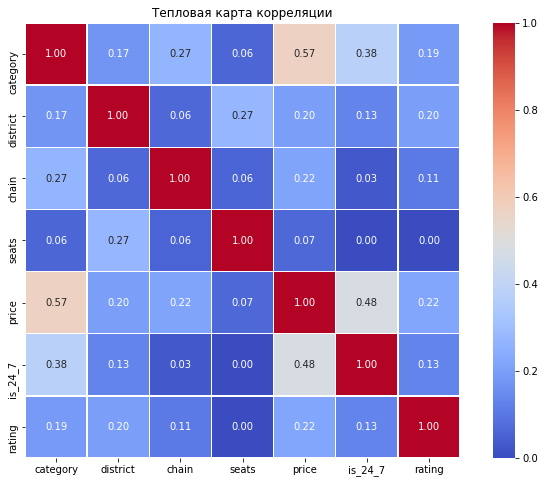

In [44]:
# Визуализируем корреляцию
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляции')
plt.show()

Наблюдается высокая корреляция между категорией заведения и уровнем цен. Также, есть заметная, но не высокая корреляция между рейтингом, уровнем цен и районом.

---

### Задача 7

**Сгруппируем данные по названиям заведений и выведем топ-15 популярных сетей в Москве. Посчитаем для них значения среднего рейтинга и посмотрим категорию заведения. Под популярностью понимается количество заведений этой сети в регионе.**

In [45]:
# Выведем топ-15 сетевых заведений города
rest_chain_1 = rest_df[rest_df['chain'] == 1]
rest_top_15 = rest_chain_1.groupby(['name', 'category'])[['id', 'rating']].agg(['count', 'mean'])
rest_top_15.columns = ['count_rest', 'avg_rating']
rest_top_15 = rest_top_15.sort_values(by=('count_rest'), ascending=False).head(15)

print(rest_top_15)

                                              count_rest  avg_rating
name                                category                        
шоколадница                         кофейня          119    4.178151
домино'с пицца                      пиццерия          76    4.169737
додо пицца                          пиццерия          74    4.286486
one price coffee                    кофейня           71    4.064789
яндекс лавка                        ресторан          69    3.872464
cofix                               кофейня           65    4.075385
prime                               ресторан          49    4.114286
кофепорт                            кофейня           42    4.147619
кулинарная лавка братьев караваевых кафе              39    4.394872
теремок                             ресторан          36    4.105556
cofefest                            кофейня           31    3.977419
чайхана                             кафе              26    3.946154
буханка                           

По количеству заведений в городе лидирует Шоколадница, на последнем месте рейтинга - сеть Кофемания.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других.


In [46]:
# Сгруппируем данные о среднем чеке по районам Москвы
rest_district_avg_bill = rest_df.groupby('district')['middle_avg_bill'].agg(['mean', 'max', 'min'])

rest_district_avg_bill = rest_district_avg_bill.rename(index={
    'Восточный административный округ': 'ВАО',
    'Западный административный округ': 'ЗАО',
    'Северный административный округ': 'САО',
    'Северо-Восточный административный округ': 'СВАО',
    'Северо-Западный административный округ': 'СЗАО',
    'Центральный административный округ': 'ЦАО',
    'Юго-Восточный административный округ': 'ЮВАО',
    'Юго-Западный административный округ': 'ЮЗАО',
    'Южный административный округ': 'ЮАО'})

rest_district_avg_bill.columns = ['mean_avg_bill', 'max_avg_bill', 'min_avg_bill']

print(rest_district_avg_bill)

          mean_avg_bill  max_avg_bill  min_avg_bill
district                                           
ВАО          820.626923       10000.0          50.0
ЗАО         1053.225490        5250.0          50.0
САО          927.959627       11000.0         130.0
СВАО         716.611296        4500.0          50.0
СЗАО         822.222930        2900.0         120.0
ЦАО         1191.057547        7250.0           0.0
ЮВАО         654.097938        3750.0          30.0
ЮЗАО         792.561702        2750.0         100.0
ЮАО          834.398089       35000.0         100.0


array([<AxesSubplot:title={'center':'Средний показатель среднего чека'}, xlabel='district'>,
       <AxesSubplot:title={'center':'Максимальный средний чек'}, xlabel='district'>,
       <AxesSubplot:title={'center':'Минимальный средний чек'}, xlabel='district'>],
      dtype=object)

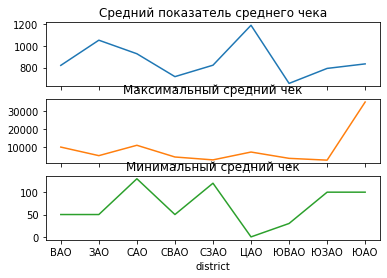

In [47]:
# Визуализируем полученные результаты
rest_district_avg_bill.plot(kind='line', 
                            subplots=True, 
                            sharex=True, 
                            sharey=False, 
                            legend=False, 
                            title=['Средний показатель среднего чека', 'Максимальный средний чек', 'Минимальный средний чек'])

По результатам исследования можем отметить следующее:
- Самый высокий максимальный средний чек наблюдается в Южном административном округе.
- Самый низкий минимальный чек является нулевым и принадлежит Центральному административному округу.
- Самый высокий средний чек наблюдается в ЦАО, на втором месте ЗАО.

In [48]:
# Посчитаем кол-во заведений в каждом районе
rest_district_count_id = rest_df.groupby('district')['id'].count()
rest_district_count_id = rest_district_count_id.sort_values(ascending=False)

print(rest_district_count_id)

district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: id, dtype: int64


---


## 4. Итоговый вывод и рекомендации

### Вывод
В результате анализа были изучены 8406 заведений, 5201 из которых являются несетевыми заведениям и 3205 - сетевыми. 
Также, было выявлено следующее:
- Большая часть заведений в Москве принадлежит к категории 'кафе'. При этом в Центральном административном округе большую часть занимают заведения категории 'рестораны'.
- Меньше всего в городе булочных.
- Выявлено большое количество заведений с аномально высоким количеством посадочных мест, что может быть связано с неверным вводом данных.
- Выявлены заведениях с 0 количеством посадочных мест, что может говорить о формате заведения 'на вынос'.
- Самый высокий рейтинг у заведений категории 'бар, паб', но в целос разница между средними рейтингами разных категорий небольшая.
- Самый высокий средний чек наблюдается в Центральном административном округе, поэтому можно сделать вывод, что заведения, расположенные ближе к центру, наиболее дорогостоящие.

### Рекомендации
По результатам анализа можно дать следующие рекомендации:
- Рассмотреть к открытию категорию заведений, которая находит в меньшинстве (например, булочная), т.к. в среди кафе и ресторанов высокая кокуренция.
- Для открытия заведения рекомендуется рассмотреть Северный административный округ, т.к. там конкуренция занчительно ниже, чем в Центральном административном округе, но при этом один из самых высоких средних чеков.